In [1]:
import tensorflow as tf
import csv
import os
import pandas as pd
import numpy as np
import shutil
import PIL
from pathlib import Path
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import glob
import piexif
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFile
Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau 


In [2]:
labelsCsv = pd.read_csv("C:/Users/manta/Desktop/new.csv")

# When generating datasets from dataframe,using ImageDataGenerator, we noticed that train and valid sets
# had a class less than the test set. So comparing the labels we realised that one single tittle had the genre
# 'Game-Show' which we have to remove so each set has the same classes
labelsCsv = labelsCsv[~labelsCsv.genres.str.contains("Game-Show")]
labelsCsv = labelsCsv[~labelsCsv.genres.str.contains("Short")]
labelsCsv.to_csv("labels.csv", sep=",", index=False)

nfiles = 0

# We remove exif metadata from pictures and resize them to max size of 128x128, while maintaining the aspect ratio
# of the original photo

#for filename in glob.iglob('C:/IMDB_m/*.jpg', recursive=True):
    #nfiles = nfiles + 1
    #print("About to process file %d, which is %s." % (nfiles,filename))
    #piexif.remove(filename)

size=(128, 128)

#for filename in glob.iglob('C:/IMDB_m/*.jpg', recursive=True):
    #im = Image.open(filename)
    #im.thumbnail(size, Image.ANTIALIAS)
    #x = filename.split("\\", 1)
    #im.save("C:/IMDB_mr/"+x[1], "JPEG")



In [3]:
all_genres = [[genre for genre in cel.split(',')] for cel in labelsCsv.genres]
one_hot = MultiLabelBinarizer()
all_genres

[['Comedy', 'Fantasy', 'Romance'],
 ['Comedy', 'Horror', 'Sci-Fi'],
 ['Drama'],
 ['Drama', 'Romance'],
 ['Comedy', 'Mystery'],
 ['Documentary'],
 ['Drama', 'Fantasy'],
 ['Musical', 'Romance'],
 ['Action', 'Adventure', 'Drama'],
 ['Documentary'],
 ['Adventure', 'Animation', 'Family'],
 ['Action'],
 ['Crime', 'Thriller'],
 ['Comedy', 'Fantasy'],
 ['Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Thriller'],
 ['Drama', 'Romance'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Biography', 'Documentary'],
 ['Comedy', 'Drama', 'Romance'],
 ['Drama', 'Music', 'Romance'],
 ['Comedy', 'Horror', 'Mystery'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Adventure', 'Animation'],
 ['Comedy', 'Drama', 'Romance'],
 ['Drama'],
 ['Comedy', 'Romance'],
 ['Drama', 'Romance'],
 ['Comedy', 'Drama', 'Sci-Fi'],
 ['Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Comedy', 'Drama'],
 ['Comedy', 'Dra

In [4]:
testss = pd.DataFrame(one_hot.fit_transform(all_genres),columns=one_hot.classes_, index=labelsCsv.index)


testss.insert(0, "filename", labelsCsv.tconst+'.jpg', True) 

testss



,filename,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
1,tt0035423.jpg,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,tt0088751.jpg,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,tt0096056.jpg,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,tt0102362.jpg,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,tt0108549.jpg,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92767,tt9724134.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
92768,tt9725138.jpg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92769,tt9725160.jpg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92772,tt9729754.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# creating and formating the dataset that we are going to use
d = {'filename' : [tconst + ".jpg" for tconst in labelsCsv.tconst],
    'labels' : [[genre for genre in cel.split(',')] for cel in labelsCsv.genres]}

img_metadata_df = pd.DataFrame(d)

train, test = train_test_split(testss, test_size=0.20, random_state=9, shuffle=True)
data_dir="C:/IMDB_mr/"
train_path = Path(data_dir, 'train.csv')
test_path = Path(data_dir, 'test.csv')
train.to_csv(train_path, sep=',', index=False)
test.to_csv(test_path, sep=',', index=False)

In [6]:
columns = list(testss.columns)[1:]
columns

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [7]:
# defining the geerators that are going to pass batches of images during training
# rescaled and resized while performing a validation split in 0.2
img_gen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

img_iter_train = img_gen.flow_from_dataframe(
    dataframe=train,
    shuffle=True,
    seed = 9,
    directory="C:/IMDB_mr/",
    x_col='filename',
    y_col=columns,
    class_mode='raw',
    target_size=(128, 128),
    batch_size=50,
    subset='training'
) 

img_iter_val = img_gen.flow_from_dataframe(
    dataframe=train,
    shuffle=True,
    seed = 9,
    directory="C:/IMDB_mr/",
    x_col='filename',
    y_col=columns,
    class_mode='raw',
    target_size=(128, 128),
    batch_size=100,
    subset='validation'
) 

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="C:/IMDB_mr/",
x_col='filename',
y_col=columns,
class_mode='raw',
batch_size=1,
seed=9,
shuffle=False,
target_size=(128, 128)
)


Found 34957 validated image filenames.
Found 8739 validated image filenames.
Found 10925 validated image filenames.


In [22]:
# definging the model and compiling using Adam optimizer with a learning
# rate of 0.001 and metry validation accuracy
model = Sequential([
Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),
Flatten(),
Dense(256, activation='relu'),
Dropout(0.5),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(25, activation='sigmoid')
])

model.compile(optimizer=Adam(lr = 0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'top_k_categorical_accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 25, 64)       

In [24]:
es = EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           verbose = 2,
                           patience = 10,
                           min_delta = 0.0001,
                           restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.00001)

In [25]:
STEP_SIZE_TRAIN=img_iter_train.n//img_iter_train.batch_size
STEP_SIZE_VALID=img_iter_val.n//img_iter_val.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size


In [26]:
history = model.fit_generator(
    generator = img_iter_train,
    validation_data = img_iter_val,
    epochs=100,
    steps_per_epoch = STEP_SIZE_TRAIN,
    validation_steps= STEP_SIZE_VALID,
    callbacks= [es, reduce_lr]
)

Epoch 1/100
699/699 [==============================] - 47s 67ms/step - loss: 0.2278 - accuracy: 0.9228 - top_k_categorical_accuracy: 0.7022 - val_loss: 0.2050 - val_accuracy: 0.9290 - val_top_k_categorical_accuracy: 0.7613
Epoch 2/100
699/699 [==============================] - 46s 66ms/step - loss: 0.2113 - accuracy: 0.9284 - top_k_categorical_accuracy: 0.7405 - val_loss: 0.2046 - val_accuracy: 0.9290 - val_top_k_categorical_accuracy: 0.7613
Epoch 3/100
699/699 [==============================] - 46s 65ms/step - loss: 0.2090 - accuracy: 0.9285 - top_k_categorical_accuracy: 0.7512 - val_loss: 0.2034 - val_accuracy: 0.9290 - val_top_k_categorical_accuracy: 0.7601
Epoch 4/100
699/699 [==============================] - 44s 63ms/step - loss: 0.2074 - accuracy: 0.9285 - top_k_categorical_accuracy: 0.7570 - val_loss: 0.2024 - val_accuracy: 0.9290 - val_top_k_categorical_accuracy: 0.7479
Epoch 5/100
699/699 [==============================] - 44s 62ms/step - loss: 0.2063 - accuracy: 0.9285 - top

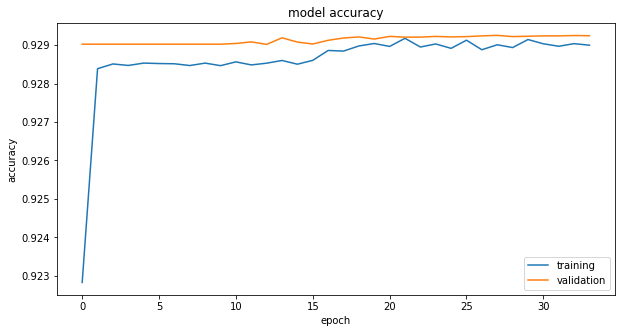

In [27]:
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

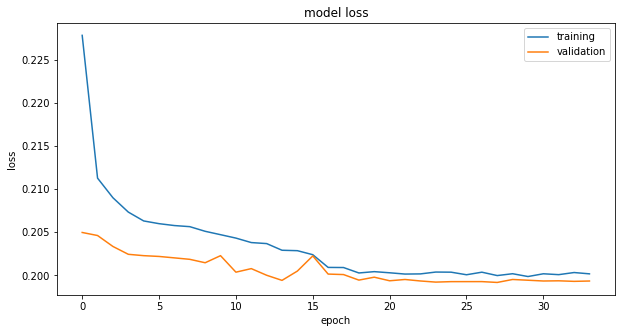

In [28]:
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [29]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

10925/10925 [==============================] - 74s 7ms/step


In [30]:
test_generator.reset()
model.evaluate_generator(generator = test_generator, 
                         steps=STEP_SIZE_TEST,
                         verbose=1)

10925/10925 [==============================] - 134s 12ms/step - loss: 0.2004 - accuracy: 0.9290 - top_k_categorical_accuracy: 0.7584


[0.20038890017831626, 0.9290288, 0.7583524]

In [ ]:
model.save('C:/IMDB_mr/Model/')
np.savetxt("preds.csv", pred, delimiter=",")

In [31]:
#pred01 = pred
#pred01[pred01 >= 0.2] = 1
#pred01[pred01 < 0.2] = 0
#np.savetxt("preds01.csv", pred01, delimiter=",")
print(pred)
#print(pred01)

[[0.04266334 0.00034174 0.05855387 ... 0.02899435 0.01493251 0.00193476]
 [0.06599635 0.00038481 0.05350271 ... 0.01869339 0.00466102 0.0020269 ]
 [0.06281257 0.000213   0.05515996 ... 0.05057621 0.01570323 0.00209858]
 ...
 [0.08223224 0.00023681 0.05548221 ... 0.09214967 0.01599723 0.00231971]
 [0.05595109 0.00024399 0.05501756 ... 0.04512963 0.01643386 0.00201518]
 [0.04258707 0.00025824 0.05688772 ... 0.03171241 0.01568443 0.00176529]]


In [ ]:
#preds_temp = pred
#predicted_class_indices=np.argmax(pred,axis=1)
#predicted3s = np.argsort(preds_temp, axis=1)[:,preds_temp.shape[1]-3::]
#test_generator.reset()
#labels = (test_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]

#filenames=test_generator.filenames
#results=pd.DataFrame({"Filename":filenames,
#                      "Predictions":predictions})
pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)

results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)
